# MODEL COMPARISON

In [726]:
import warnings
warnings.filterwarnings('ignore')  #ignore warnings
import numpy as np                 #library used for working with arrays
import matplotlib.pyplot as plt    #create,plot,decorate figures
import seaborn as sns              #data visualization
import pandas as pd                #working with table data
%matplotlib inline
sns.set_style('darkgrid')          #setting styles

In [727]:
df=pd.read_csv('E:/Project/Diabetes/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [728]:
print("Shape of Data is==>",df.shape)

Shape of Data is==> (768, 9)


In [729]:
df.info()         #information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [730]:
df.describe().T                #description

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [731]:
for i in df.columns:                #variable names
    print(i)             

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [732]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace=True,axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [733]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

################################################################

📌Defining a function for Detecting and Exluding Outliers

################################################################

In [734]:
def std_based(col_name,df):                    #taking range between mean- or +std
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

############################################################

📌 Checking if there are any NULL values.

############################################################

In [735]:
df.isnull().sum()                            #this will show the number of missing values.

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [736]:
df['Pregnancies'].describe()               #description

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

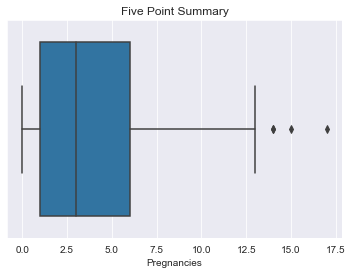

In [737]:
#sns.boxplot use to draw boxplots

sns.boxplot('Pregnancies',data=df).set_title('Five Point Summary')

Text(0.5, 1.0, 'Five Point Summary')

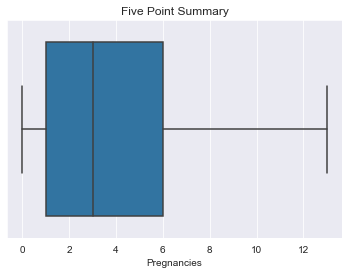

In [738]:
#Treating outlier and verifying it

df = std_based('Pregnancies',df)

sns.boxplot('Pregnancies',data=df).set_title('Five Point Summary')

In [739]:
df['Glucose'].describe()

count    764.000000
mean     120.776178
std       31.946234
min        0.000000
25%       99.000000
50%      117.000000
75%      140.000000
max      199.000000
Name: Glucose, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

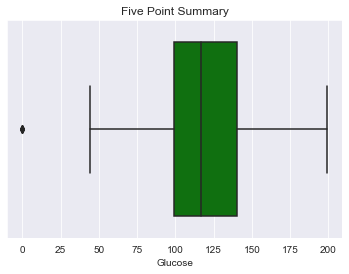

In [740]:
sns.boxplot('Glucose',data=df,color='green').set_title('Five Point Summary')

In [741]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean()) ##### 0 values are replaced by mean ###### 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Five Point Summary')

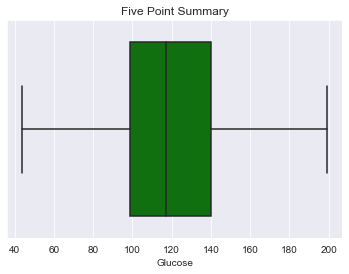

In [742]:
sns.boxplot('Glucose',data=df,color='g').set_title('Five Point Summary')

In [743]:
df.BloodPressure.describe()

count    764.000000
mean      69.098168
std       19.401789
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

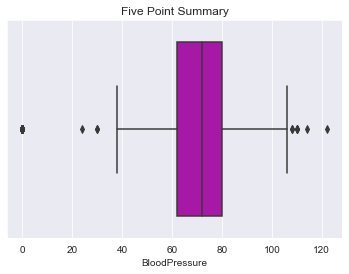

In [744]:
sns.boxplot('BloodPressure',data=df,color='m').set_title('Five Point Summary')

In [745]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1


In [746]:
df  = std_based('BloodPressure',df)

Text(0.5, 1.0, 'Five Point Summary')

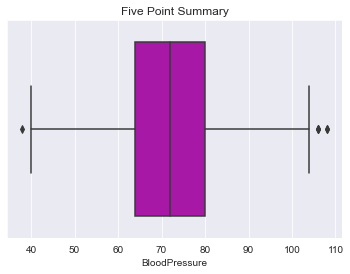

In [747]:
sns.boxplot('BloodPressure',data=df,color='m').set_title('Five Point Summary')

In [748]:
df.SkinThickness.describe()

count    756.000000
mean      20.428571
std       15.952377
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [749]:
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,0,33.6,0.627,50,1
1,1,85.0,66,29.000000,0,26.6,0.351,31,0
2,8,183.0,64,20.428571,0,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [750]:
df = std_based("SkinThickness",df)

Text(0.5, 1.0, 'Five Point Summary')

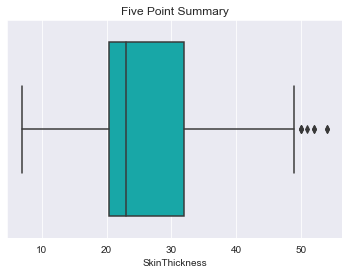

In [751]:
sns.boxplot('SkinThickness',data=df,color='c').set_title('Five Point Summary')

In [752]:
df.Insulin.describe()

count    752.000000
mean      79.889628
std      115.995453
min        0.000000
25%        0.000000
50%       26.000000
75%      128.250000
max      846.000000
Name: Insulin, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

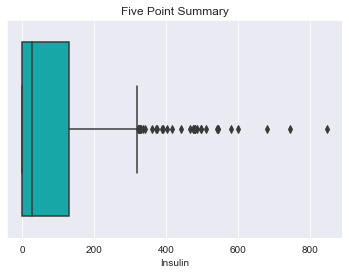

In [753]:
sns.boxplot('Insulin',data=df,color='c').set_title('Five Point Summary')

In [754]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


In [755]:
df = std_based('Insulin',df)

Text(0.5, 1.0, 'Five Point Summary')

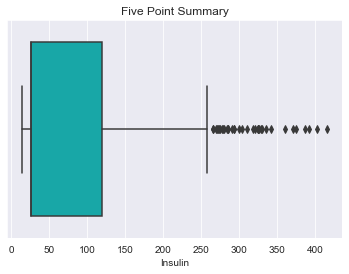

In [756]:
sns.boxplot('Insulin',data=df,color='c').set_title('Five Point Summary')

In [757]:
df.BMI.describe()

count    734.000000
mean      31.649728
std        7.630830
min        0.000000
25%       27.025000
50%       32.000000
75%       36.100000
max       57.300000
Name: BMI, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

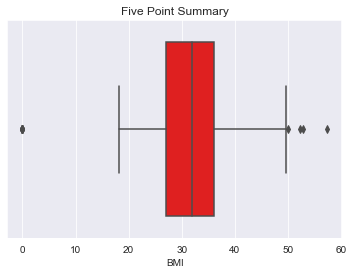

In [758]:
sns.boxplot('BMI',data=df,color='r').set_title('Five Point Summary')

In [759]:
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
4,0,137.0,40,35.000000,168,43.1,2.288,33,1


Text(0.5, 1.0, 'Five Point Summary')

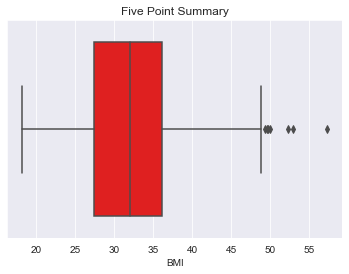

In [760]:
sns.boxplot('BMI',data=df,color='r').set_title('Five Point Summary')

In [761]:
df.DPF.describe()

count    734.000000
mean       0.464274
std        0.313676
min        0.078000
25%        0.244000
50%        0.367000
75%        0.612750
max        2.288000
Name: DPF, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

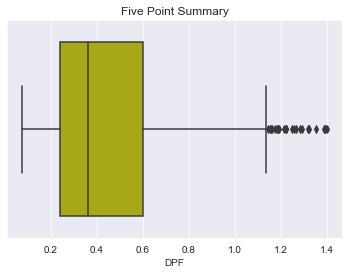

In [762]:
df = std_based('DPF',df)

sns.boxplot('DPF',data=df,color='y').set_title('Five Point Summary')

In [763]:
df.Age.describe()

count    724.000000
mean      33.111878
std       11.711371
min       21.000000
25%       24.000000
50%       29.000000
75%       40.000000
max       81.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Five Point Summary')

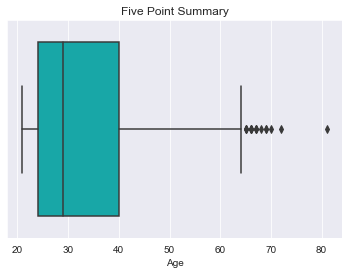

In [764]:

sns.boxplot('Age',data=df,color='c').set_title('Five Point Summary')

In [765]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72,35.000000,26,33.6,0.627,50,1
1,1,85.0,66,29.000000,26,26.6,0.351,31,0
2,8,183.0,64,20.428571,26,23.3,0.672,32,1
3,1,89.0,66,23.000000,94,28.1,0.167,21,0
5,5,116.0,74,20.428571,26,25.6,0.201,30,0


In [766]:
df.shape

(724, 9)

In [767]:
df.var()

Pregnancies        10.676041
Glucose           868.450814
BloodPressure     128.189700
SkinThickness      80.621245
Insulin          6360.775382
BMI                42.783512
DPF                 0.077310
Age               137.156207
Outcome             0.223293
dtype: float64

In [768]:
df.drop('DPF',axis = 1,inplace=True) ###DPF is removed ###

In [769]:
df.Outcome.value_counts()

0    481
1    243
Name: Outcome, dtype: int64

In [770]:
def sens(TP,FN):
    a=TP/(TP+FN)
    return a
def spec(TN,FP):
    b=TN/(TN+FP)
    return b

In [771]:
x=df.iloc[:,:-1].values           #iloc() used to select particular cell of data set
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(579, 7)
(145, 7)
(579,)
(145,)


#########################################

Standard Scaler()

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.
#########################################

In [772]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train) # fitting and transforming to normal
x_test_std = ss.transform(x_test)

In [773]:
seed_value=123

In [774]:
# auc = Area under curve
# roc = receiver operating characteristic
# threshold=  the assignment of pixel values in relation to the threshold value provided.
#             In thresholding, each pixel value is compared with the threshold value. 
#             If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255)
# tp= true positive rate
# fp= false positive rate

In [775]:
############Naive Bayes###########
# Gaussian: It is used in classification and it assumes that features follow a normal distribution.

In [776]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb.fit(x_train_std,y_train)
y_pred_nb=model_nb.predict(x_test_std)                     #predict the labels of the data values on the basis of the trained model
from sklearn import metrics                                # metrics lib =measure classification performance
accugaussNB= metrics.accuracy_score (y_test,y_pred_nb)     #computes accuracy
print("Accuracy for Gaussian Naive Bayes is", accugaussNB)

Accuracy for Gaussian Naive Bayes is 0.7931034482758621


In [777]:
print(metrics.classification_report(y_test,y_pred_nb))
print(metrics.confusion_matrix(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       103
           1       0.66      0.60      0.62        42

    accuracy                           0.79       145
   macro avg       0.75      0.73      0.74       145
weighted avg       0.79      0.79      0.79       145

[[90 13]
 [17 25]]


In [778]:
TP,TN,FP,FN=90,25,17,13  
anb=sens(TP,FN)
bnb=spec(TN,FP)
print("Sensitivity is ",anb)
print("Specificity is ",bnb)

Sensitivity is  0.8737864077669902
Specificity is  0.5952380952380952


In [779]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probas_pred_nb=model_nb.predict_proba(x_test_std)
fpnb, tpnb, thresholdsnb = roc_curve(y_test,probas_pred_nb[:,1],pos_label=1)
roc_auc_nb=auc(fpnb, tpnb)
print("AUC for Gaussian Naive Bayes : ",roc_auc_nb)

AUC for Gaussian Naive Bayes :  0.8606102635228849


In [780]:
def plot_roc_curve(fpnb,tpnb):
    plt.plot(fpnb,tpnb,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

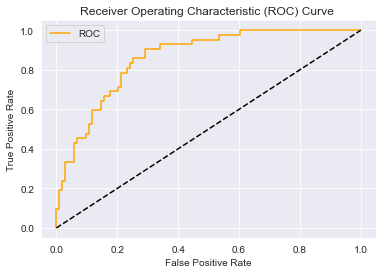

In [781]:
plot_roc_curve(fpnb,tpnb)

In [782]:
#########KNN Classifier############

In [783]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics                                              #how the performance of machine learning algorithms is measured 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV     # grid= loop through predefined hyperparameters
knn=KNeighborsClassifier()
param_grid = {'n_neighbors':[5,10,15,25,30,50]}
grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)
grid_knn.fit(x_train_std,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 25, 30, 50]},
             scoring='accuracy')

In [784]:
# minkowski distance formula
# deprecated= if code is faulty it replaces with new code for diff value of k
# paramgrid=checking for different values of k
# pre_dispatch = task performed in queue
# verbose= produce detailed output 
# cv= cross validation
# p=2 == we are using euclidean distance.

In [785]:
print("Tuned Parameters==>",grid_knn.best_params_)

Tuned Parameters==> {'n_neighbors': 30}


In [786]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train_std,y_train)
y_pred_knn=knn.predict(x_test_std)
from sklearn import metrics
accuKNN=metrics.accuracy_score(y_test,y_pred_knn)
print("Accuracy for KNN Classifier is",accuKNN)

Accuracy for KNN Classifier is 0.8275862068965517


In [787]:
print(metrics.classification_report(y_test,y_pred_knn))
print(metrics.confusion_matrix(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       103
           1       0.81      0.52      0.64        42

    accuracy                           0.83       145
   macro avg       0.82      0.74      0.76       145
weighted avg       0.83      0.83      0.81       145

[[98  5]
 [20 22]]


In [788]:
TP,TN,FP,FN=98,22,20,5
aknn=sens(TP,FN)
bknn=spec(TN,FP)
print("Sensitivity is ",aknn)
print("Specificity is ",bknn)

Sensitivity is  0.9514563106796117
Specificity is  0.5238095238095238


In [789]:
probas_pred_knn=knn.predict_proba(x_test_std)
fpknn, tpknn, thresholdsknn = roc_curve(y_test,probas_pred_knn[:,1],pos_label=1)
roc_auc_knn=auc(fpknn, tpknn)
print("AUC for K Nearest Neighbors : ",roc_auc_knn)

AUC for K Nearest Neighbors :  0.8829172445677301


In [790]:
def plot_roc_curve(fpknn,tpknn):
    plt.plot(fpknn,tpknn,color='green',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

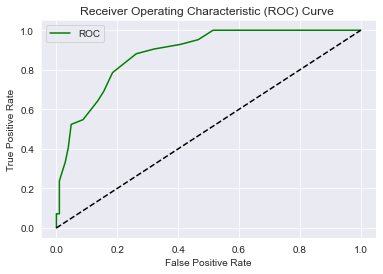

In [791]:
plot_roc_curve(fpknn,tpknn)

In [792]:
########Linear Discriminant Analysis########

In [793]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis()
lda.fit(x_train_std,y_train)
y_pred_lda=lda.predict(x_test_std)
from sklearn import metrics
accuLDA=metrics.accuracy_score(y_test,y_pred_lda)
print('The Accuracy of the Linear Discriminant Analysis is',accuLDA)

The Accuracy of the Linear Discriminant Analysis is 0.8137931034482758


In [794]:
print(metrics.classification_report(y_test,y_pred_lda))
print(metrics.confusion_matrix(y_test,y_pred_lda))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.73      0.57      0.64        42

    accuracy                           0.81       145
   macro avg       0.78      0.74      0.76       145
weighted avg       0.81      0.81      0.81       145

[[94  9]
 [18 24]]


In [795]:
TP,TN,FP,FN=94,24,18,9
alda=sens(TP,FN)
blda=spec(TN,FP)
print("Sensitivity is ",alda)
print("Specificity is ",blda)

Sensitivity is  0.912621359223301
Specificity is  0.5714285714285714


In [796]:
probas_pred_lda=lda.predict_proba(x_test_std)
fplda, tplda, thresholdslda = roc_curve(y_test,probas_pred_lda[:,1],pos_label=1)
roc_auc_lda=auc(fplda, tplda)
print("AUC for Linear Discriminant Analysis is : ",roc_auc_lda)

AUC for Linear Discriminant Analysis is :  0.8580674988441979


In [797]:
def plot_roc_curve(fplda,tplda):
    plt.plot(fplda,tplda,color='brown',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

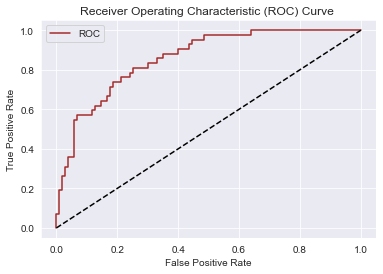

In [798]:
plot_roc_curve(fplda,tplda)

In [799]:
########Random Forest Classifier########

In [800]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
param_grid={'n_estimators':[200,500,1000]}
grid_rfc=RandomizedSearchCV(rfc,param_grid,n_iter=20,scoring='accuracy',cv=10,refit=True)
grid_rfc.fit(x_train_std,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'n_estimators': [200, 500, 1000]},
                   scoring='accuracy')

In [801]:
# n_iter= (number of iterations) or (trial and score)
# RandomizedSearchCV implements a “fit”, “score” method,predict,etc,etc

In [802]:
print("Tuned Parameters==>",grid_rfc.best_params_)

Tuned Parameters==> {'n_estimators': 200}


In [803]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train_std,y_train)

RandomForestClassifier(n_estimators=200)

In [804]:
y_pred_rfc=rfc.predict(x_test_std)
from sklearn import metrics
accuRF=metrics.accuracy_score(y_test,y_pred_rfc)
print("Accuracy for Random Forest Classifier is",accuRF)

Accuracy for Random Forest Classifier is 0.7862068965517242


In [805]:
print(metrics.classification_report(y_test,y_pred_rfc))
print(metrics.confusion_matrix(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       103
           1       0.65      0.57      0.61        42

    accuracy                           0.79       145
   macro avg       0.74      0.72      0.73       145
weighted avg       0.78      0.79      0.78       145

[[90 13]
 [18 24]]


In [806]:
TP,TN,FP,FN=90,24,18,13
arf=sens(TP,FN)
brf=spec(TN,FP)
print("Sensitivity is ",arf)
print("Specificity is ",brf)

Sensitivity is  0.8737864077669902
Specificity is  0.5714285714285714


In [807]:
probas_pred_rfc=rfc.predict_proba(x_test_std)
fprf, tprf, thresholdsrf = roc_curve(y_test,probas_pred_rfc[:,1],pos_label=1)
roc_auc_rf=auc(fprf, tprf)
print("AUC for Random Forest : ",roc_auc_rf)

AUC for Random Forest :  0.8504392048081368


In [808]:
def plot_roc_curve(fprf,tprf):
    plt.plot(fprf,tprf,color='red',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

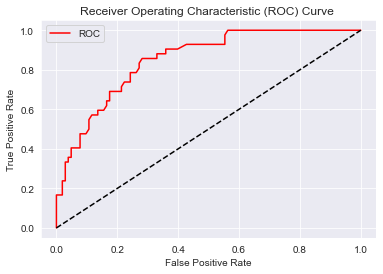

In [809]:
plot_roc_curve(fprf,tprf)

In [810]:
#######Logistic Regression######

In [811]:
from sklearn.linear_model import LogisticRegression
model_lr= LogisticRegression()
model_lr.fit(x_train_std,y_train)
y_pred_lr=model_lr.predict(x_test_std)
from sklearn import metrics
accuLR=metrics.accuracy_score(y_test,y_pred_lr)
print('The Accuracy of the Logistic Regression is',accuLR)

The Accuracy of the Logistic Regression is 0.8137931034482758


In [812]:
print(metrics.classification_report(y_test,y_pred_lr))
print(metrics.confusion_matrix(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.73      0.57      0.64        42

    accuracy                           0.81       145
   macro avg       0.78      0.74      0.76       145
weighted avg       0.81      0.81      0.81       145

[[94  9]
 [18 24]]


In [813]:
TP,TN,FP,FN=94,24,18,9
alr=sens(TP,FN)
blr=spec(TN,FP)
print("Sensitivity is ",alr)
print("Specificity is ",blr)

Sensitivity is  0.912621359223301
Specificity is  0.5714285714285714


In [814]:
probas_pred_lr=model_lr.predict_proba(x_test_std)
fplr, tplr, thresholdslr = roc_curve(y_test,probas_pred_lr[:,1],pos_label=1)
roc_auc_lr=auc(fplr, tplr)
print("AUC for Logistic Regression Model : ",roc_auc_lr)

AUC for Logistic Regression Model :  0.8566805362921868


In [815]:
def plot_roc_curve(fplr,tplr):
    plt.plot(fplr,tplr,color='blue',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

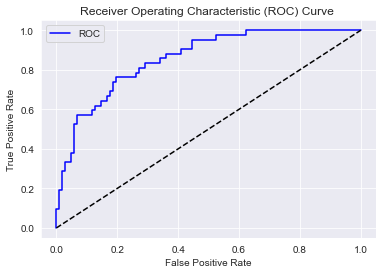

In [816]:
plot_roc_curve(fplr,tplr)

In [817]:
#############Decision Tress##########

In [818]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train_std,y_train)
y_pred_dt=model_dt.predict(x_test_std)
from sklearn import metrics
accuDT=metrics.accuracy_score(y_test,y_pred_dt)
print('The Accuracy of Decision tree model is',accuDT)

The Accuracy of Decision tree model is 0.7241379310344828


In [819]:
test_pred_dt=model_dt.predict(x_test_std)
print(metrics.classification_report(y_test,test_pred_dt))
print(metrics.confusion_matrix(y_test,test_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       103
           1       0.52      0.57      0.55        42

    accuracy                           0.72       145
   macro avg       0.67      0.68      0.67       145
weighted avg       0.73      0.72      0.73       145

[[81 22]
 [18 24]]


In [820]:
TP,TN,FP,FN=81,24,22,18
adt=sens(TP,FN)
bdt=spec(TN,FP)
print("Sensitivity is ",adt)
print("Specificity is ",bdt)


Sensitivity is  0.8181818181818182
Specificity is  0.5217391304347826


In [821]:
probas_pred_dt=model_dt.predict_proba(x_test_std)
fpdt, tpdt, thresholdsdt = roc_curve(y_test,probas_pred_dt[:,1],pos_label=1)
roc_auc_dt=auc(fpdt, tpdt)
print("AUC for Decision Trees : ",roc_auc_dt)

AUC for Decision Trees :  0.6789181692094313


In [822]:
def plot_roc_curve(fpdt,tpdt):
    plt.plot(fpdt,tpdt,color='grey',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

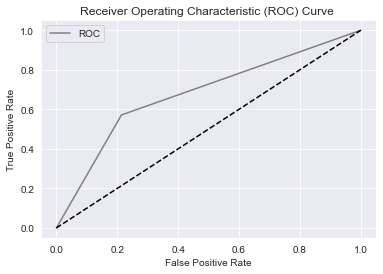

In [823]:
plot_roc_curve(fpdt,tpdt)

In [824]:
##########SVC-linear############

In [825]:
from sklearn.svm import SVC
svc_linear= SVC(C= 0.5, kernel= 'linear', random_state= 0, probability=True)
svc_linear.fit(x_train_std, y_train)
y_pred_svc_linear=svc_linear.predict(x_test_std)
from sklearn import metrics
accuSVC_linear=metrics.accuracy_score(y_test,y_pred_svc_linear)
print("Accuracy for SVC-linear Classifier is",accuSVC_linear)

Accuracy for SVC-linear Classifier is 0.8137931034482758


In [826]:
print(metrics.classification_report(y_test,y_pred_svc_linear))
print(metrics.confusion_matrix(y_test,y_pred_svc_linear))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       103
           1       0.73      0.57      0.64        42

    accuracy                           0.81       145
   macro avg       0.78      0.74      0.76       145
weighted avg       0.81      0.81      0.81       145

[[94  9]
 [18 24]]


In [827]:
TP,TN,FP,FN=94,24,18,9
asvclinear=sens(TP,FN)
bsvclinear=spec(TN,FP)
print("Sensitivity is ",asvclinear)
print("Specificity is ",bsvclinear)

Sensitivity is  0.912621359223301
Specificity is  0.5714285714285714


In [828]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probas_pred_svc_linear=svc_linear.predict_proba(x_test_std)
fpsvclinear, tpsvclinear, thresholdssvclinear = roc_curve(y_test,probas_pred_svc_linear[:,1],pos_label=1)
roc_auc_svc_linear=auc(fpsvclinear, tpsvclinear)
print("AUC for SVC-linear : ",roc_auc_svc_linear)

AUC for SVC-linear :  0.858067498844198


In [829]:
def plot_roc_curve(fpsvclinear,tpsvclinear):
    plt.plot(fpsvclinear,tpsvclinear,color='cyan',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

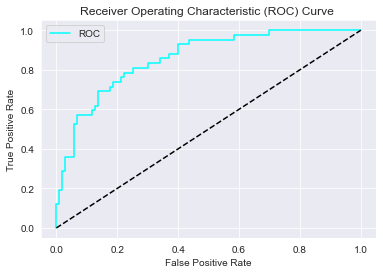

In [830]:
plot_roc_curve(fpsvclinear,tpsvclinear)

In [831]:
#########SVC-radial##########

In [832]:
from sklearn.svm import SVC
svc_radial= SVC(C=0.5, kernel= 'rbf',random_state= 0, gamma=0.12,tol=0.00001, probability=True)
svc_radial.fit(x_train_std, y_train)
y_pred_svc_radial=svc_radial.predict(x_test_std)
from sklearn import metrics
accuSVC_radial=metrics.accuracy_score(y_test,y_pred_svc_radial)
print("Accuracy for SVC-radial Classifier is",accuSVC_radial)

Accuracy for SVC-radial Classifier is 0.8068965517241379


In [833]:
print(metrics.classification_report(y_test,y_pred_svc_radial))
print(metrics.confusion_matrix(y_test,y_pred_svc_radial))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       103
           1       0.75      0.50      0.60        42

    accuracy                           0.81       145
   macro avg       0.79      0.72      0.74       145
weighted avg       0.80      0.81      0.79       145

[[96  7]
 [21 21]]


In [834]:
TP,TN,FP,FN=96,21,21,7
asvcradial=sens(TP,FN)
bsvcradial=spec(TN,FP)
print("Sensitivity is ",asvcradial)
print("Specificity is ",bsvcradial)

Sensitivity is  0.9320388349514563
Specificity is  0.5


In [835]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probas_pred_svc_radial=svc_radial.predict_proba(x_test_std)
fpsvcradial, tpsvcradial, thresholdssvcradial = roc_curve(y_test,probas_pred_svc_radial[:,1],pos_label=1)
roc_auc_svc_radial=auc(fpsvcradial, tpsvcradial)
print("AUC for SVC-radial : ",roc_auc_svc_radial)

AUC for SVC-radial :  0.8675450762829403


In [836]:
def plot_roc_curve(fpsvcradial,tpsvcradial):
    plt.plot(fpsvcradial,tpsvcradial,color='violet',label='ROC')
    plt.plot([0,1],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve ')
    plt.legend()
    plt.show

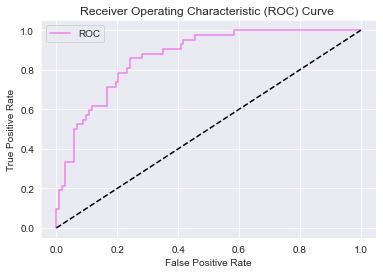

In [837]:
plot_roc_curve(fpsvcradial,tpsvcradial)

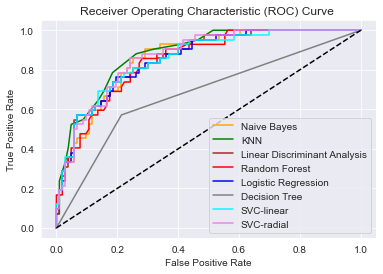

In [838]:
plt.plot(fpnb,tpnb,color='orange',label='Naive Bayes')
plt.plot(fpknn,tpknn,color='green',label='KNN')
plt.plot(fplda,tplda,color='brown',label='Linear Discriminant Analysis')
plt.plot(fprf,tprf,color='red',label='Random Forest')
plt.plot(fplr,tplr,color='blue',label='Logistic Regression')
plt.plot(fpdt,tpdt,color='grey',label='Decision Tree')
plt.plot(fpsvclinear,tpsvclinear,color='cyan',label='SVC-linear')
plt.plot(fpsvcradial,tpsvcradial,color='violet',label='SVC-radial')
plt.plot([0,1],[0,1],color='black',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ')
plt.legend()
plt.show
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [839]:
data={'Model':['Gaussian NB','K-Nearest Neighbours','Linear Discriminant Analysis','Random Forest','Logistic','Decision Tress','SVC-linear','SVC-radial'],
     'Accuracy':[accugaussNB,accuKNN,accuLDA,accuRF,accuLR,accuDT,accuSVC_linear,accuSVC_radial],
     'AUC':[roc_auc_nb,roc_auc_knn,roc_auc_lda,roc_auc_rf,roc_auc_lr,roc_auc_dt,roc_auc_svc_linear,roc_auc_svc_radial],
     'Sensitivity':[anb,aknn,alda,arf,alr,adt,asvclinear,asvcradial],'Specificity':[bnb,bknn,blda,brf,blr,bdt,bsvclinear,bsvcradial]}
df=pd.DataFrame(data)
df_new=df.style.set_properties(**{'text-align':'left'})
df_new

,Model,Accuracy,AUC,Sensitivity,Specificity
0,Gaussian NB,0.793103,0.860610,0.873786,0.595238
1,K-Nearest Neighbours,0.827586,0.882917,0.951456,0.523810
2,Linear Discriminant Analysis,0.813793,0.858067,0.912621,0.571429
3,Random Forest,0.786207,0.850439,0.873786,0.571429
4,Logistic,0.813793,0.856681,0.912621,0.571429
5,Decision Tress,0.724138,0.678918,0.818182,0.521739
6,SVC-linear,0.813793,0.858067,0.912621,0.571429
7,SVC-radial,0.806897,0.867545,0.932039,0.500000
